## Paso 1:


(2000, 206) (206,) (206, 206)
(2000,)


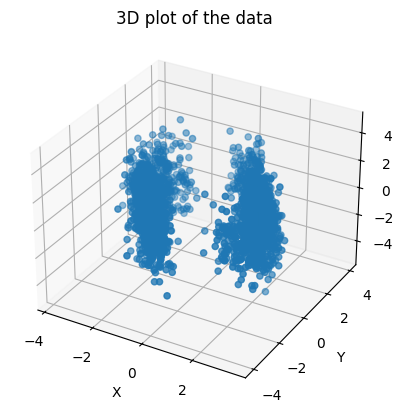

[[87.00981809  0.        ]
 [ 0.         71.31046752]]


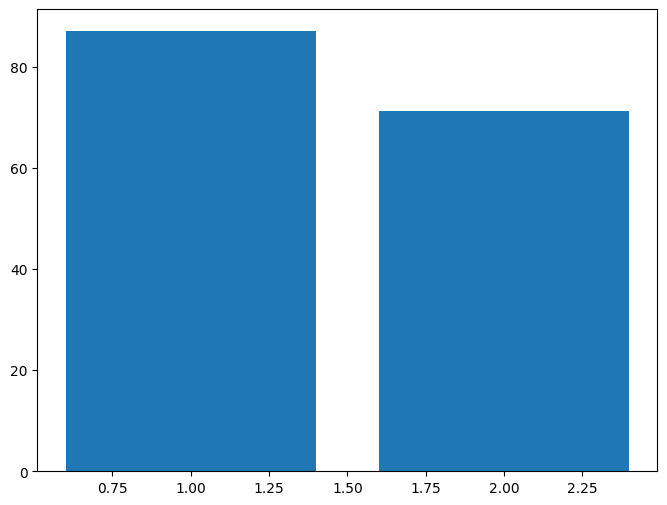

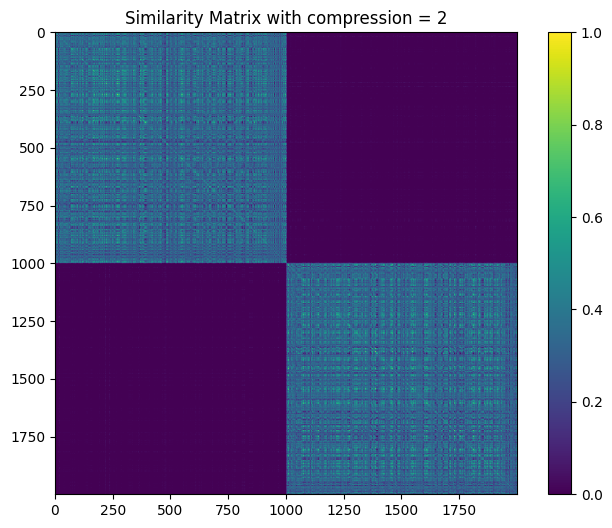

[[87.00981809  0.          0.          0.          0.          0.        ]
 [ 0.         71.31046752  0.          0.          0.          0.        ]
 [ 0.          0.         58.64208768  0.          0.          0.        ]
 [ 0.          0.          0.         58.04780554  0.          0.        ]
 [ 0.          0.          0.          0.         57.53092544  0.        ]
 [ 0.          0.          0.          0.          0.         57.4512608 ]]


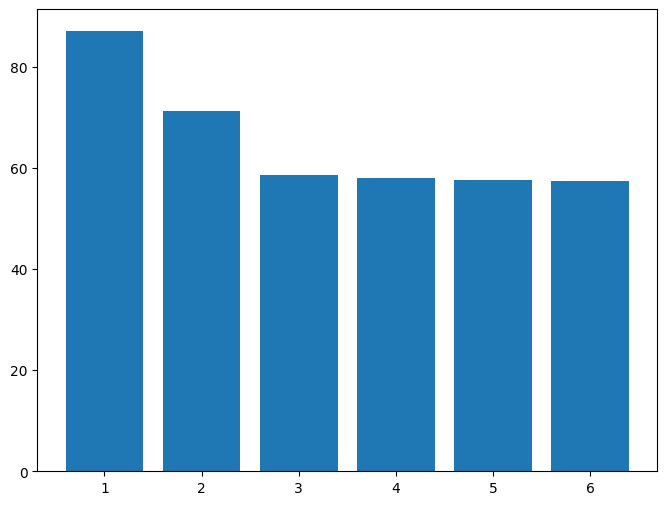

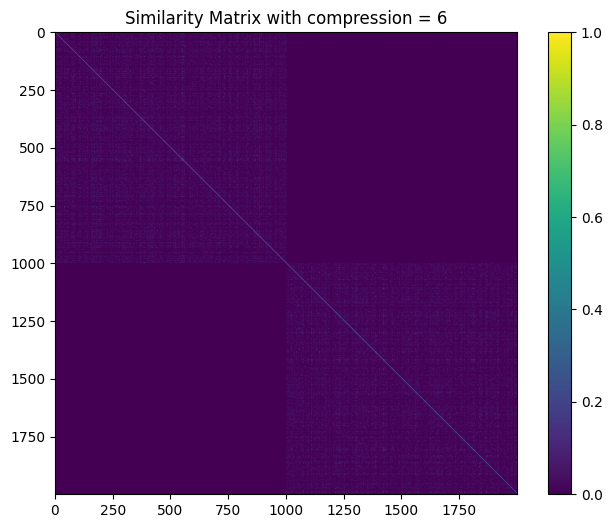

[[87.00981809  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         71.31046752  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         58.64208768  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         58.04780554  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         57.53092544  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         57.4512608
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  56.92003552  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         56.84065528  0.          0.        ]
 [ 0.          0.          0.          0.          0.    

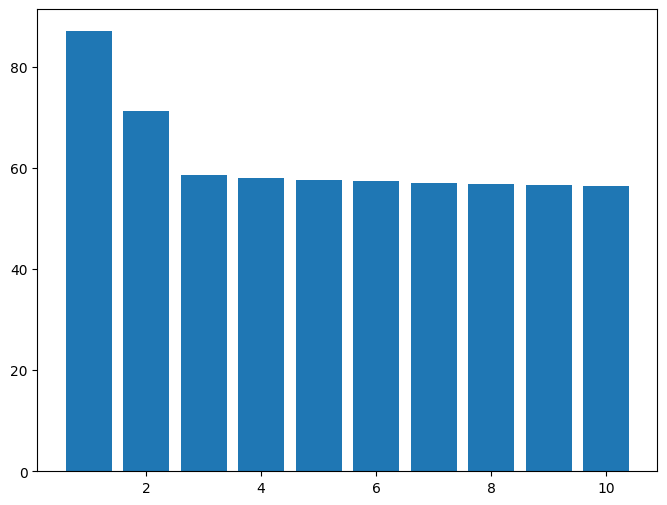

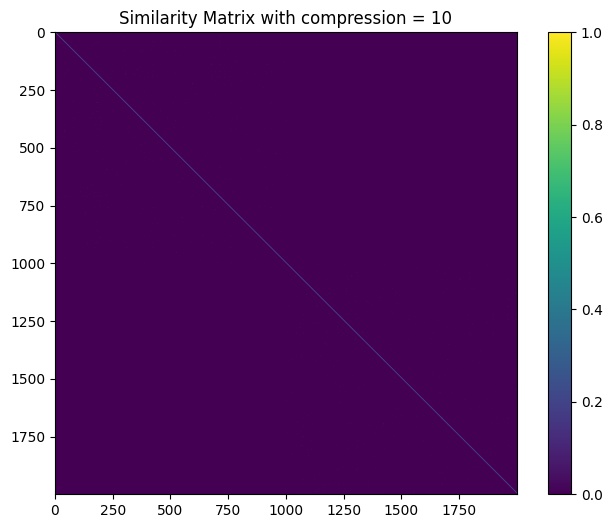

[[8.70098181e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.13104675e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.86420877e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.83727783e-14
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.77700650e-14 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.44520783e-14]]


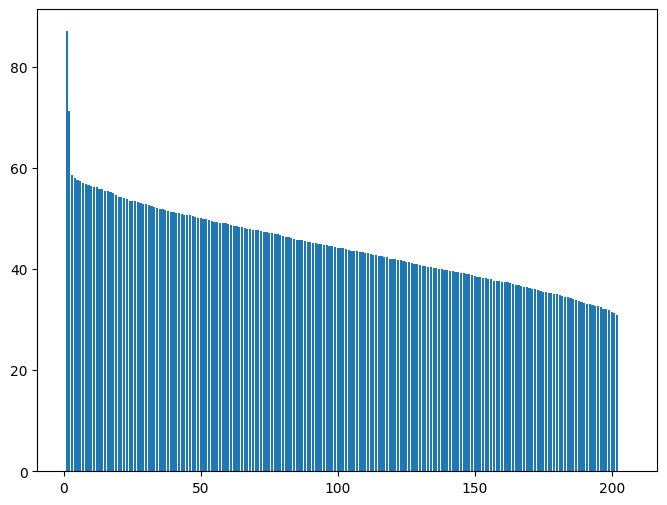

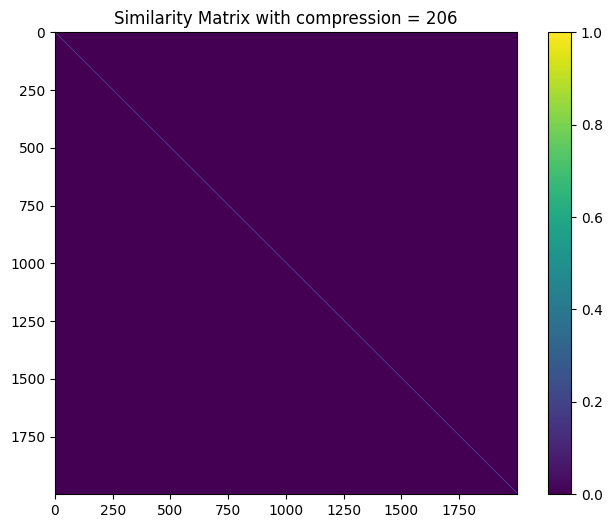

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
compression_values = [2, 6, 10]
j = 0
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('dataset01.csv')

# Remove the first row (column names)
#df = df.iloc[1:]

# Remove the first column (row numbers)
df = df.iloc[:, 1:]

# Convert the remaining columns to float
df = df.astype(float)

# Convert the DataFrame to a numpy array
X = df.values
compression_values += [X.shape[1]]
Y = np.loadtxt('y1.txt')



X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

U,S,VT = np.linalg.svd(X_centered, full_matrices=False)
print(U.shape, S.shape, VT.shape)
Z = U@S
print(Z.shape)
xyz = np.zeros((X.shape[0],3))
for i in range(X.shape[0]):
    xyz[i,0] = VT[0,:]@X_centered[i,:]
    xyz[i,1] = VT[1,:]@X_centered[i,:]
    xyz[i,2] = VT[2,:]@X_centered[i,:]



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the x, y, and z coordinates
ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2])

# Set labels for the x, y, and z axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D plot of the data')

# Show the plot
plt.show()






def similarity_matrix(X, sigma):
    distances = squareform(pdist(X, 'euclidean'))
    k = np.exp(-distances**2/(2*sigma**2))
    return k

for compression in compression_values:
    
    #Matrix U
    U_hat = U[:,:compression]
    #Matrix S
    S_hat = np.diag(S[:compression])
    print(S_hat)
    # VT matrix
    VT_hat = VT[:compression, :]
    #Matrix XV 
    XV_hat = U_hat @ S_hat 
    doms = np.linspace(1,compression,compression)
    #Singular values plot:
    plt.figure(figsize=(8,6))
    plt.bar(doms,S[:compression])

    
    # plt.figure(figsize=(8, 6))
    # plt.subplot(2,2,1)
    # #Heatmap of matrixU
    # sns.heatmap(U_hat, cmap='coolwarm', center=0)
    # plt.title('Matrix U with compression = ' + str(compression))
    # #Plot the matrix S
    # # plt.figure(figsize=(8, 6))
    # plt.subplot(2,2,2)
    # plt.imshow(S_hat, cmap='coolwarm')
    # plt.colorbar()
    # plt.title('Matrix S with compression = ' + str(compression))
    # plt.subplot(2,2,3)
    # # Heatmap of matrix VT
    # sns.heatmap(VT_hat, cmap='coolwarm', center=0)
    # plt.title('Matrix VT with compression = ' + str(compression))
    # # plt.show()
    # plt.subplot(2,2,4)
    # # Heatmap of matrix XV
    # sns.heatmap(XV_hat, cmap='coolwarm', center=0)
    # plt.title('Matrix XV with compression = ' + str(compression))
    # plt.show()


    sigma = 1.0
    
    # Calculate the similarity matrix
    similarity = similarity_matrix(XV_hat, sigma)
    
    # Display the similarity matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(similarity, cmap='viridis')
    plt.colorbar()
    plt.title('Similarity Matrix with compression = ' + str(compression))
    plt.show()

    





## Paso 2: Identificación de dimensiones más representativas

## Paso 3: Paso 3: Modelado lineal y predicción